In [6]:
import pandas as pd

# Load shop profile data
combined_features = pd.read_csv('data/Shop_Features.csv')
shop_profile_data = pd.read_csv('data/Store-info.csv')
shop_profile_data = shop_profile_data[['shop_id', 'shop_profile']]

# Remove rows with null values in the shop_profile column
shop_profile_data = shop_profile_data.dropna(subset=['shop_profile'])

# Define a mapping from the categorical shop_profile values to integers
shop_profile_mapping = {'Low': 1, 'Moderate': 2, 'High': 3}

# Replace the shop_profile values with their corresponding integer values
shop_profile_data['shop_profile'] = shop_profile_data['shop_profile'].replace(shop_profile_mapping)

# Merge the cleaned shop profile data with the combined_features DataFrame
combined_features_with_profile = combined_features.merge(shop_profile_data, on='shop_id', how='inner')

In [7]:
# Create new features
combined_features_with_profile['product_sales_per_area'] = combined_features_with_profile['total_sales'] * combined_features_with_profile['shop_area_sq_ft']
combined_features_with_profile['product_customers_per_quantity_sold'] = combined_features_with_profile['total_unique_customers'] * combined_features_with_profile['total_quantity_sold']

# Check the new features
combined_features_with_profile.head()

,shop_id,total_sales,total_quantity_sold,total_bills,total_transactions,total_unique_items,total_unique_customers,total_weeks,total_unique_dates,shop_area_sq_ft,shop_profile,product_sales_per_area,product_customers_per_quantity_sold
0,SHOP001,1485285,3942,1542,1980,46,1106,10,7,580,1,861465300,4359852
1,SHOP003,1922995,6959,2859,3597,52,2038,10,7,810,3,1557625950,14182442
2,SHOP004,1571700,6401,2618,3392,45,1724,10,7,516,1,810997200,11035324
3,SHOP005,2148520,7784,3201,4138,56,2189,10,7,617,1,1325636840,17039176
4,SHOP006,1876955,7195,2869,3700,53,2013,10,7,676,1,1268821580,14483535


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
# Set up the plot
sns.set(style="whitegrid")

In [9]:
# Define the new features
new_features = [
    'total_sales',
    'total_unique_customers',
    'total_quantity_sold',
    'product_customers_per_quantity_sold',
    'shop_area_sq_ft',
]

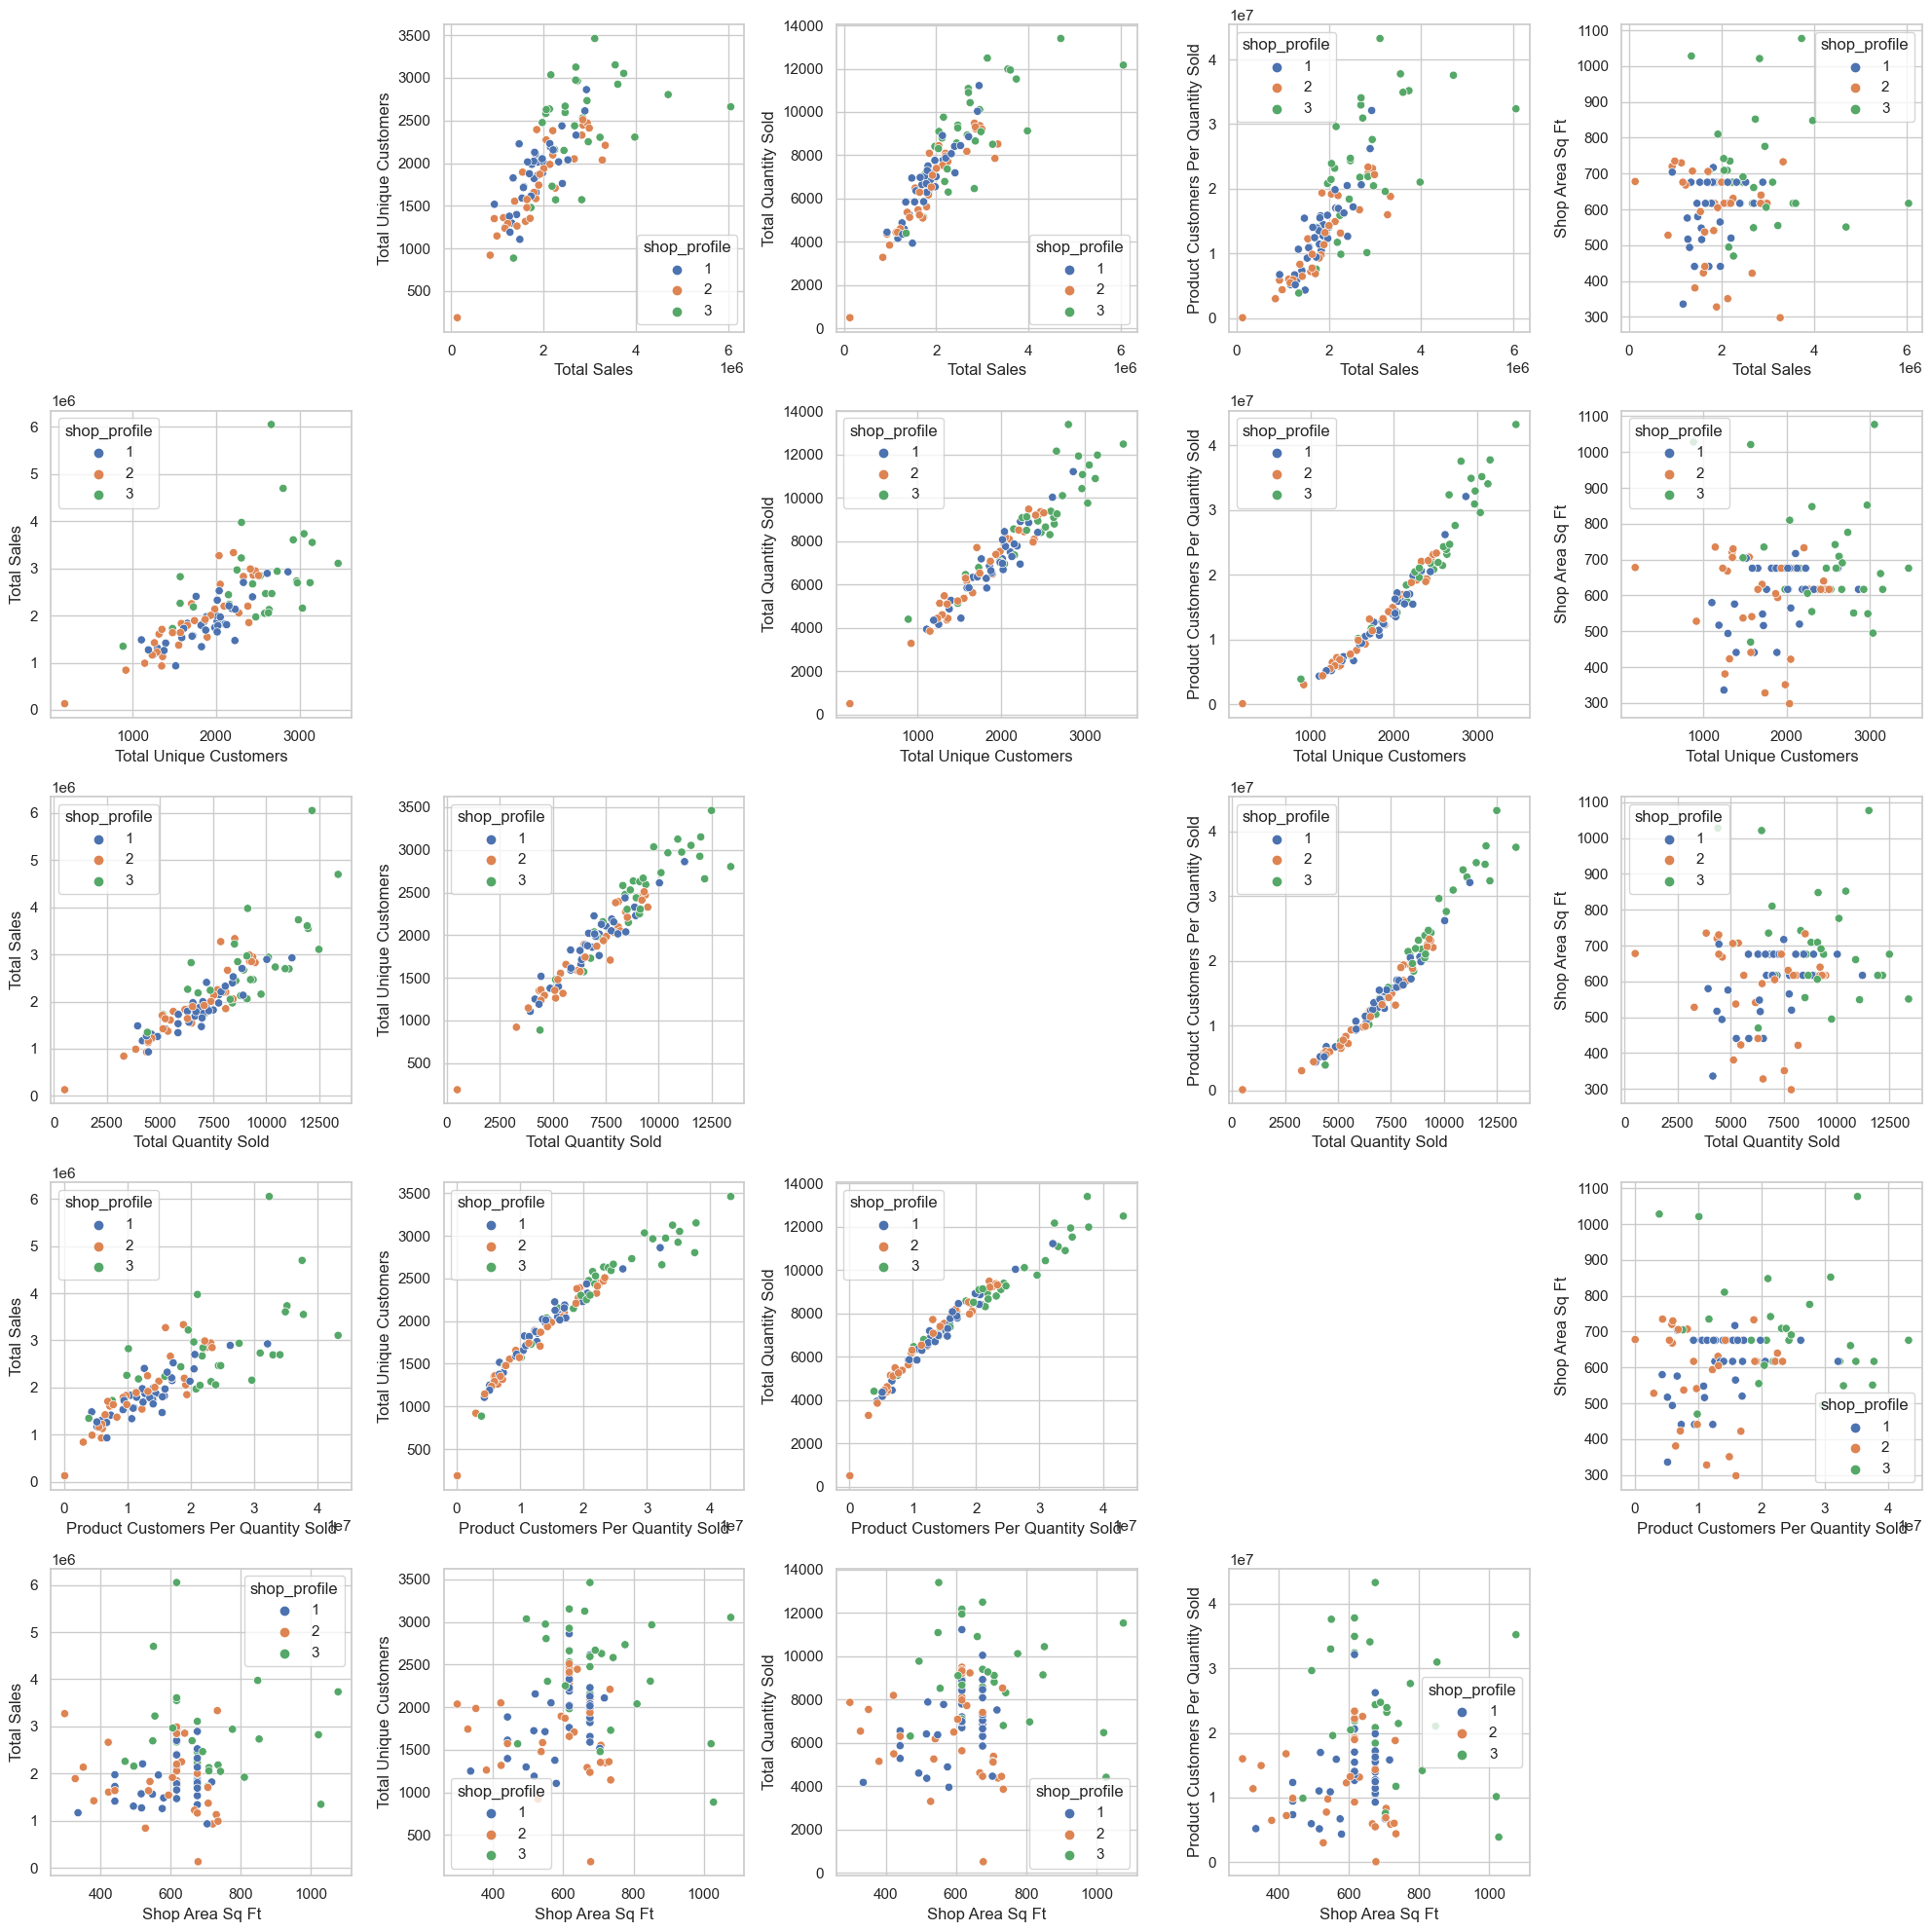

In [10]:
# Create scatter plots for each pair of new features and color points by shop_profile
fig, axes = plt.subplots(len(new_features), len(new_features), figsize=(20, 20))

for i, feature_x in enumerate(new_features):
    for j, feature_y in enumerate(new_features):
        if i == j:
            axes[i, j].set_visible(False)
            continue

        sns.scatterplot(ax=axes[i, j], x=combined_features_with_profile[feature_x], y=combined_features_with_profile[feature_y],
                        hue=combined_features_with_profile['shop_profile'], palette="deep")

        axes[i, j].set_xlabel(feature_x.replace('_', ' ').title())
        axes[i, j].set_ylabel(feature_y.replace('_', ' ').title())

plt.tight_layout()
plt.show()
